## 2. Data Understanding.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#H1N1 and Seasonal Flu Vaccines
df1 = pd.read_csv('H1N1_Flu_Vaccines.csv')
df1.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


### Describtion of Data

* Data format: CSV file (H1N1_Flu_Vaccines.csv).
* Number of records (rows): 26,000 respondents (varies depending on version of dataset).
* Number of fields (columns): 36 features + 2 target labels (h1n1_vaccine, seasonal_vaccine).
* Field identities: Columns represent demographic, behavioral, medical, and opinion-based survey responses (e.g., age_group, sex, h1n1_concern, doctor_recc_h1n1, employment_status).

* Missing values: Some fields (like employment_industry, employment_occupation, health_insurance) have missing data.

* Inconsistent entries: Check for unexpected values (e.g., misspelled categories, out-of-range numbers).

* Imbalanced data: If far more people did not vaccinate compared to those who did, models may get biased toward predicting "not vaccinated."

* Data types: Ensure categorical features are encoded properly (e.g., strings vs. integers).

* Duplicates: Check if any respondents appear more than once.

### Vaccine Targets (Dependent Variables)

**h1n1_vaccine → Did the person receive the H1N1 vaccine? (1 = yes, 0 = no).**

**seasonal_vaccine → Did the person receive the seasonal flu vaccine? (1 = yes, 0 = no).**
* respondent_id → Unique ID for each survey participant.
* h1n1_concern → Level of concern about H1N1 flu (e.g., not at all, somewhat, very concerned).
* h1n1_knowledge → Self-rated knowledge about H1N1 flu (low, medium, high).
* behavioral_antiviral_meds → Did they take antiviral medications to prevent flu?
* behavioral_avoidance → Did they avoid large gatherings?
* behavioral_face_mask → Did they wear a face mask?
* behavioral_wash_hands → Did they wash hands frequently?
* behavioral_large_gatherings → Did they avoid large gatherings?
* behavioral_outside_home → Did they limit time outside home?
* behavioral_touch_face → Did they avoid touching face?
* doctor_recc_h1n1 → Did a doctor recommend the H1N1 vaccine?
* doctor_recc_seasonal → Did a doctor recommend the seasonal flu vaccine?
* chronic_med_condition → Does the person have a chronic medical condition (e.g., diabetes, asthma)?
* child_under_6_months → Is there a child under 6 months old in the household? (since babies can’t be vaccinated).
* health_worker → Is the person a health care worker?
* health_insurance → Do they have health insurance coverage?
* opinion_h1n1_vacc_effective → Belief in H1N1 vaccine effectiveness.
* opinion_h1n1_risk → Perceived personal risk of getting H1N1 flu.
* opinion_h1n1_sick_from_vacc → Belief that H1N1 vaccine might cause sickness.
* opinion_seas_vacc_effective → Belief in seasonal flu vaccine effectiveness.
* opinion_seas_risk → Perceived personal risk of getting seasonal flu.
* opinion_seas_sick_from_vacc → Belief that seasonal flu vaccine might cause sickness.
* age_group → Age category of respondent (e.g., 18–34, 35–44, 65+).
* education → Education level (e.g., less than high school, some college, college graduate).
* race → Self-reported race/ethnicity.
* sex → Gender of respondent.
* income_poverty → Household income relative to poverty line.
* marital_status → Married, single, divorced, etc.
* rent_or_own → Housing situation (rent or own).
* employment_status → Employment status (employed, unemployed, retired).
* employment_industry → Industry where respondent works.
* employment_occupation → Occupation of respondent.
* hhs_geo_region → U.S. Department of Health and Human Services region (geographic code).
* census_msa → Metropolitan Statistical Area (urban/rural type).
* household_adults → Number of adults in the household.
* household_children → Number of children in the household.

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [4]:
df1.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'h1n1_vaccine', 'seasonal_vaccine'],
      dtype='object')

In [5]:
df1.isnull().sum()/df1.shape[0]*100

respondent_id                   0.000000
h1n1_concern                    0.344479
h1n1_knowledge                  0.434343
behavioral_antiviral_meds       0.265848
behavioral_avoidance            0.778822
behavioral_face_mask            0.071142
behavioral_wash_hands           0.157262
behavioral_large_gatherings     0.325757
behavioral_outside_home         0.307036
behavioral_touch_face           0.479275
doctor_recc_h1n1                8.087767
doctor_recc_seasonal            8.087767
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
health_insurance               45.957989
opinion_h1n1_vacc_effective     1.464036
opinion_h1n1_risk               1.452803
opinion_h1n1_sick_from_vacc     1.479013
opinion_seas_vacc_effective     1.729884
opinion_seas_risk               1.924589
opinion_seas_sick_from_vacc     2.010709
age_group                       0.000000
education                       5.268282
race            

In [6]:
df1.dtypes

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

In [7]:
df1['h1n1_vaccine'].unique()

array([0, 1], dtype=int64)

In [8]:
df1['seasonal_vaccine'].unique()

array([0, 1], dtype=int64)

In [9]:
df1.duplicated().sum()

0

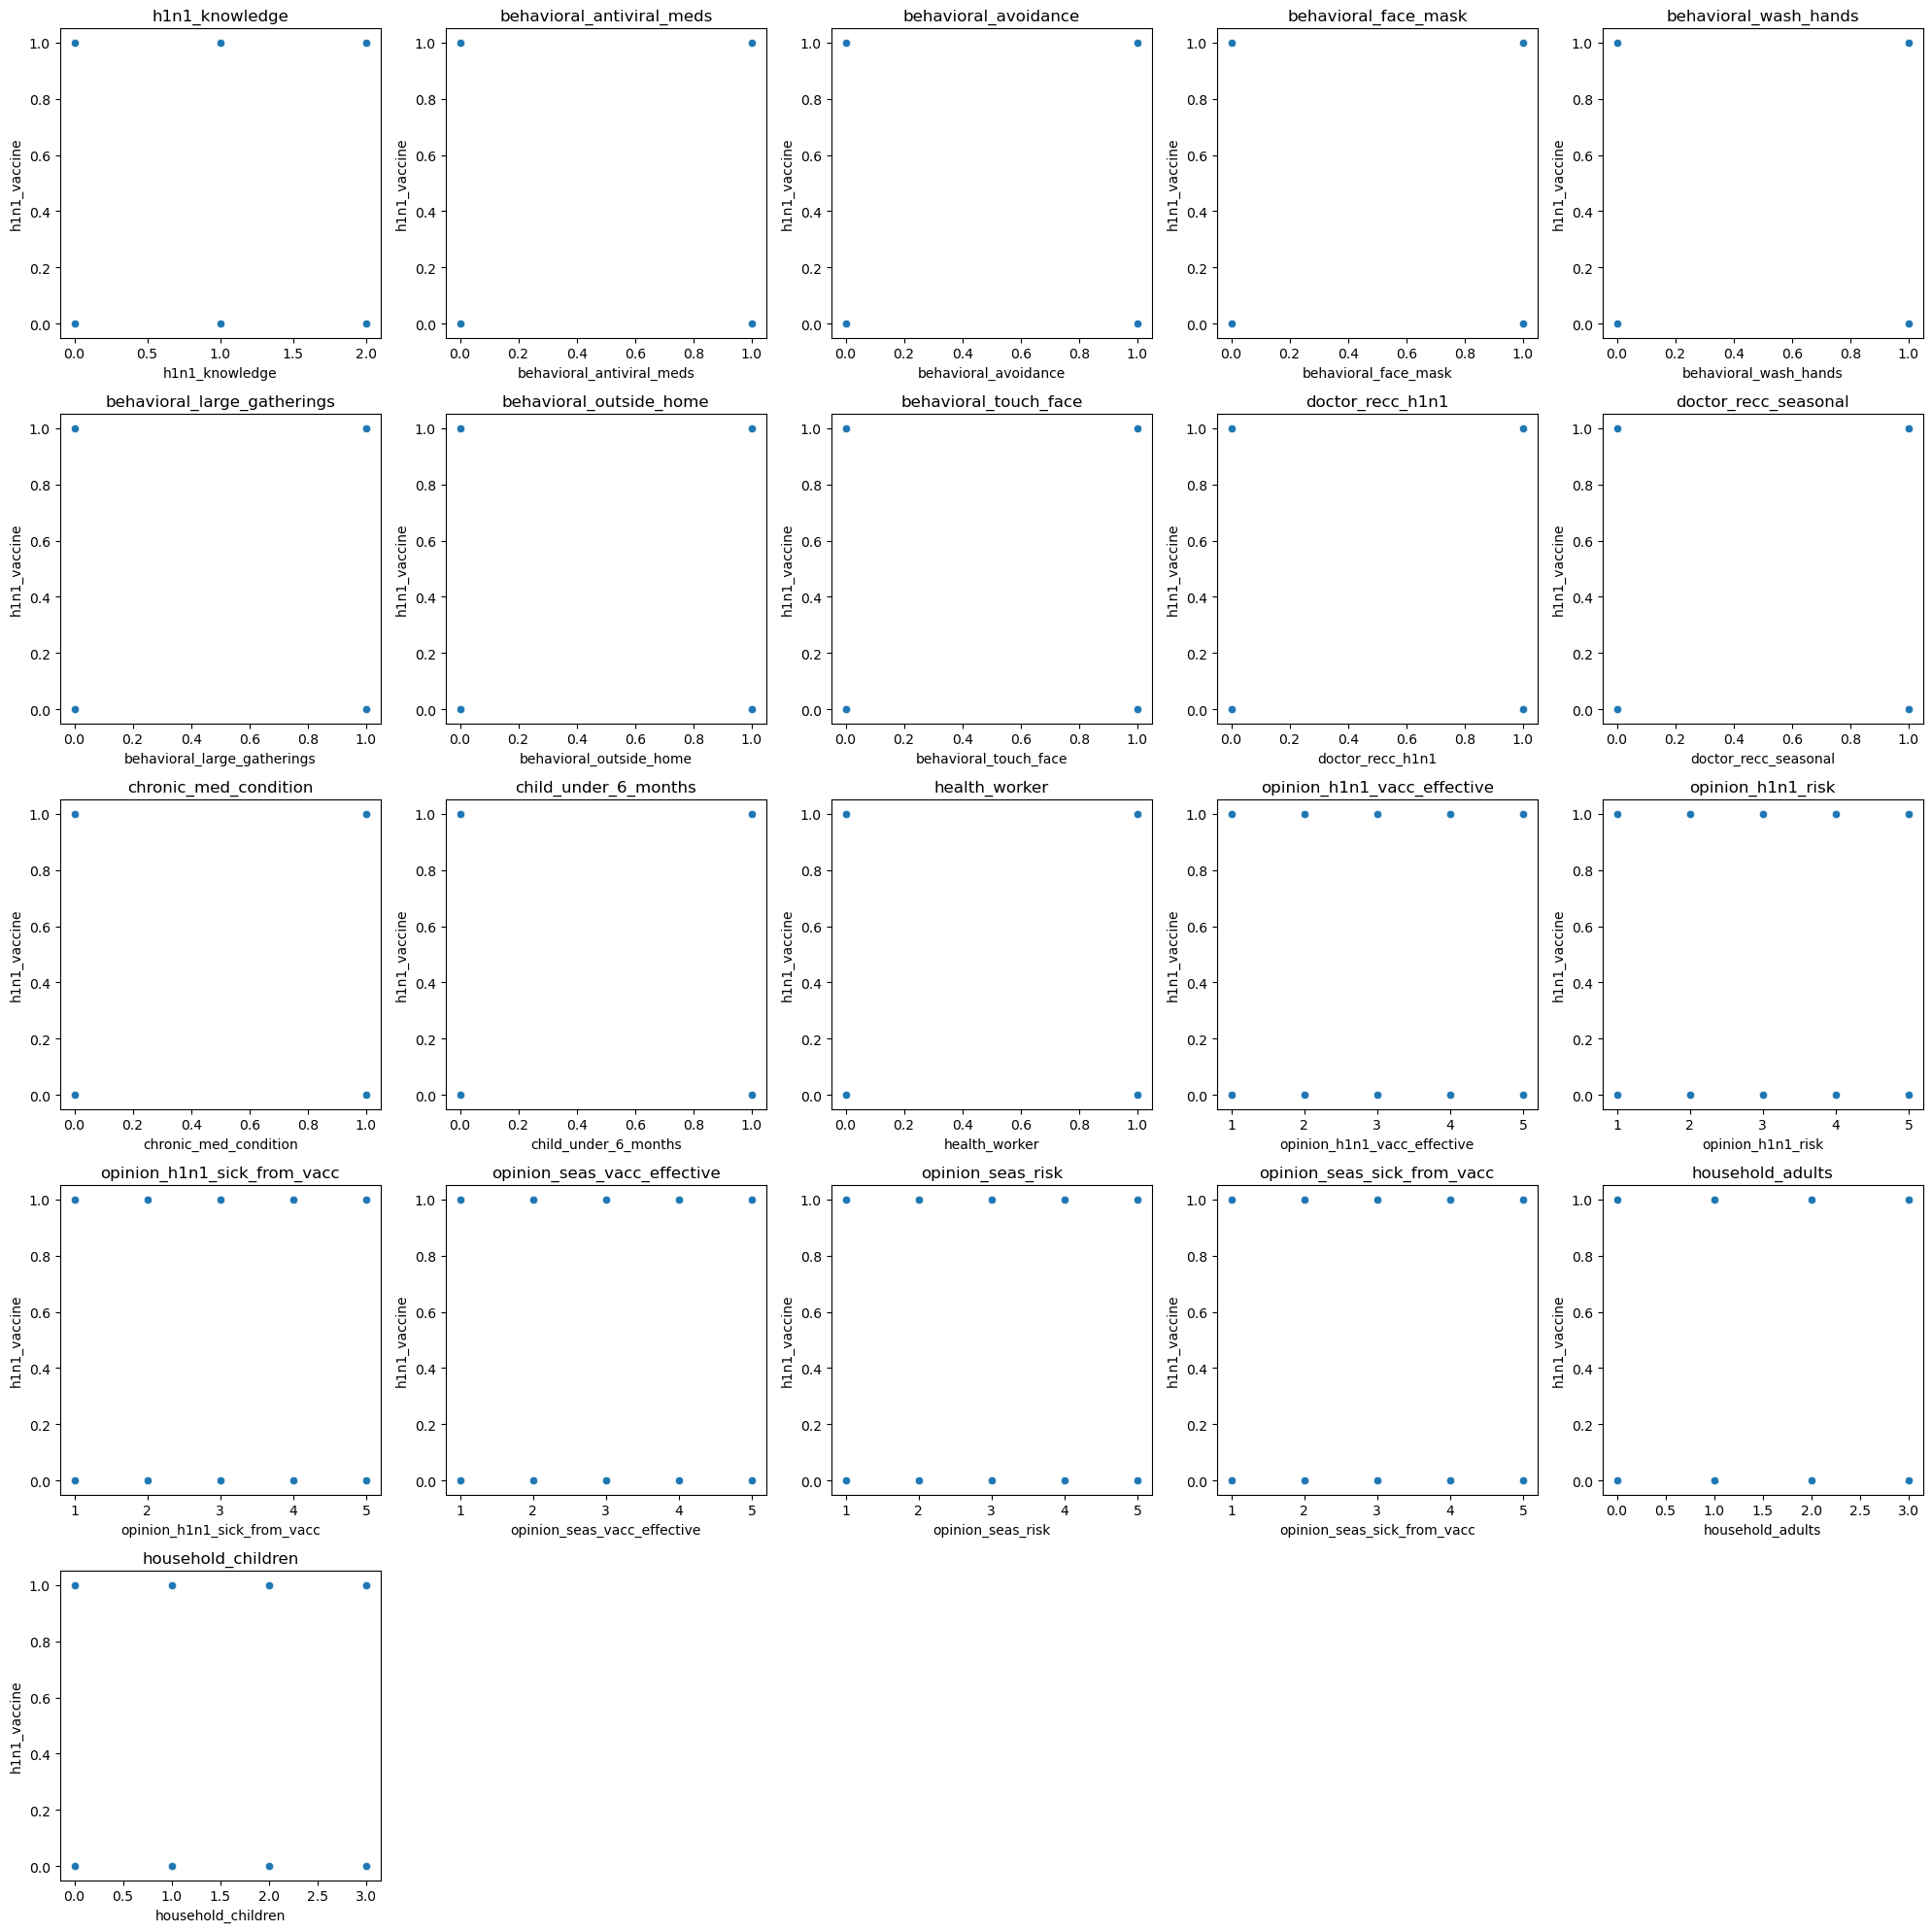

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of features to plot
features = [
    'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance',
    'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings',
    'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1',
    'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months',
    'health_worker', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
    'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
    'opinion_seas_risk', 'opinion_seas_sick_from_vacc',
    'household_adults', 'household_children'
]

# Setup subplot grid (5 rows x 5 columns, enough for 21 features)
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 20))
axes = axes.flatten()

# Loop through features and create scatter plots
for idx, feature in enumerate(features):
    sns.scatterplot(data=df1, x=feature, y='h1n1_vaccine', ax=axes[idx])
    axes[idx].set_title(feature)

# Hide empty subplots (since we have 21 plots but a 5x5 grid = 25 slots)
for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


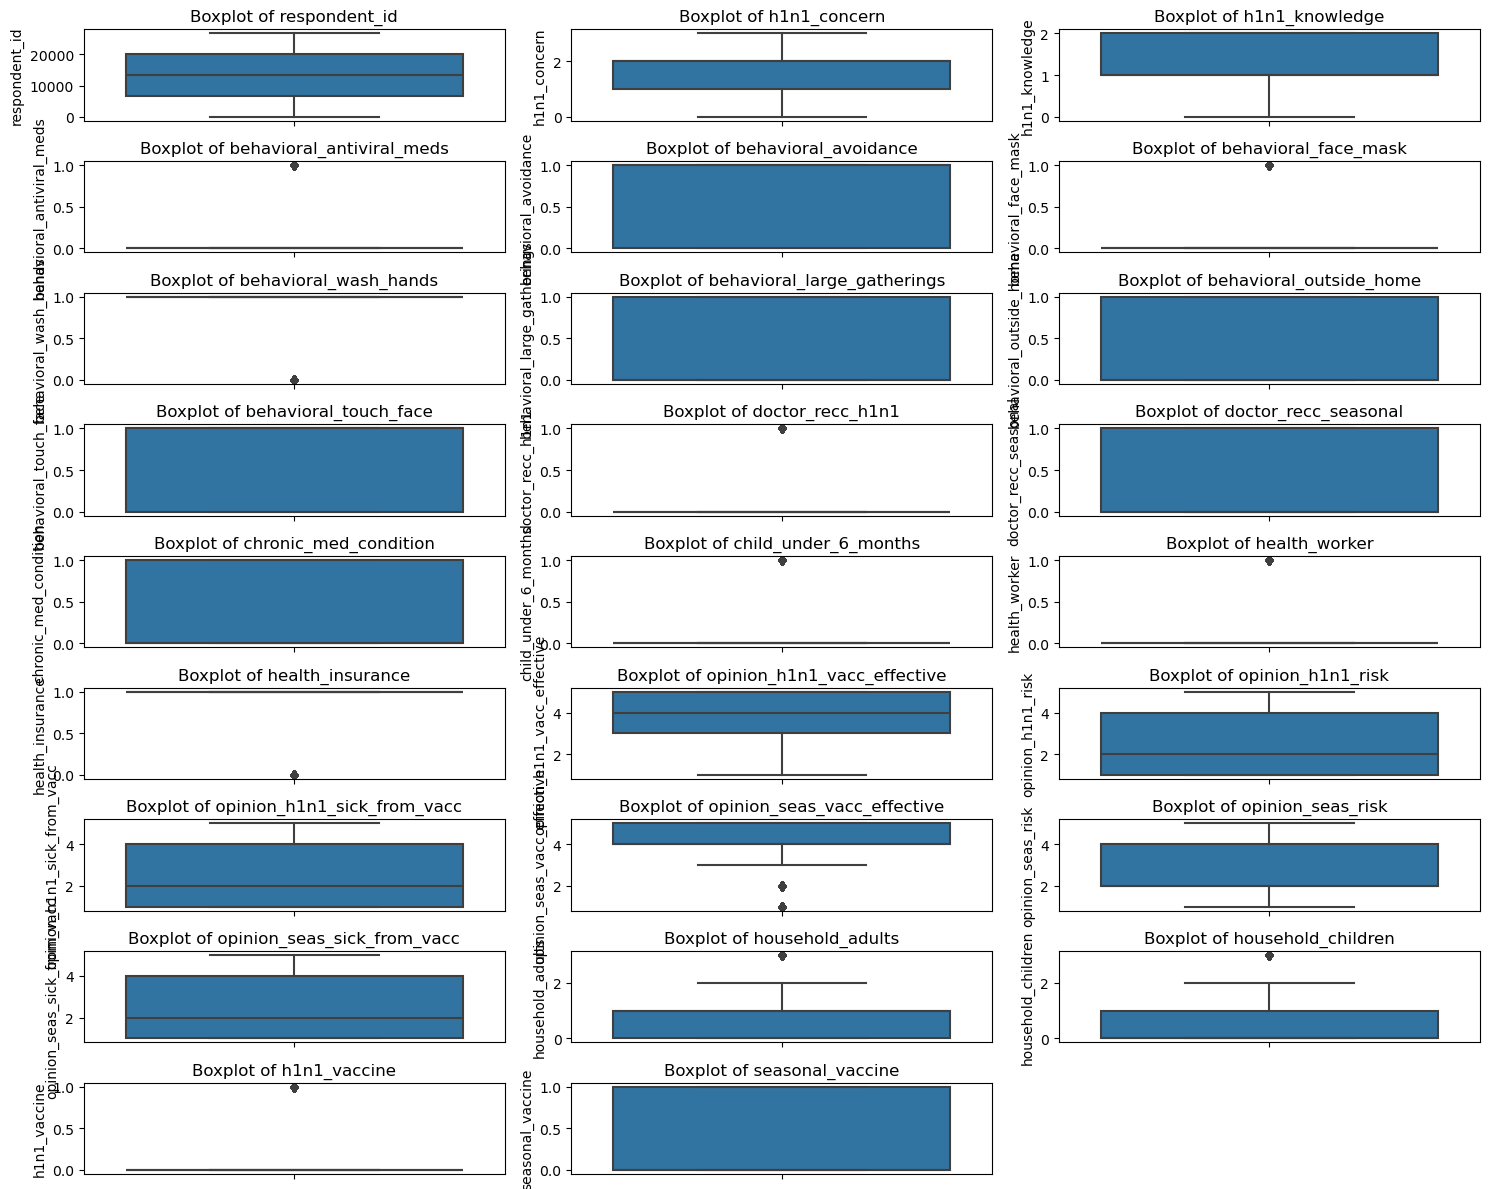

In [11]:
numeric_cols = df1.select_dtypes(include='number').columns
n = len(numeric_cols)

# Create subplots (adjust rows/cols depending on number of features)
fig, axes = plt.subplots(nrows=(n // 3) + 1, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(y=df1[col], ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")

# Remove empty subplots if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()